In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
nn_pred = pd.read_csv('Data/Neural_Net_Predictions.csv', index_col=0)['nn_pred'].reset_index(drop=True)
rf_pred = pd.read_csv('Data/RF_Best_Model_Predictions.csv', index_col=0)['values'].reset_index(drop=True)
true_val = pd.read_csv('Data/data.csv', index_col=0)['RV_t (Realized Variance)'][150:].reset_index(drop=True)

In [11]:
mse_rf = mean_squared_error(rf_pred, true_val)
mse_nn = mean_squared_error(nn_pred, true_val)

print("Overall MSE Comparison")
print(f"RF: {mse_rf:.2e}")
print(f"NN: {mse_nn:.2e}")
print("")

mse_rf_annual = {'2020': mean_squared_error(rf_pred.iloc[:290], true_val.iloc[:290]),
                 '2021': mean_squared_error(rf_pred.iloc[290:540], true_val.iloc[290:540]),
                 '2022': mean_squared_error(rf_pred.iloc[540:789], true_val.iloc[540:789]),
                 '2023': mean_squared_error(rf_pred.iloc[789:], true_val.iloc[789:])}

mse_nn_annual = {'2020': mean_squared_error(nn_pred.iloc[:290], true_val.iloc[:290]),
                 '2021': mean_squared_error(nn_pred.iloc[290:540], true_val.iloc[290:540]),
                 '2022': mean_squared_error(nn_pred.iloc[540:789], true_val.iloc[540:789]),
                 '2023': mean_squared_error(nn_pred.iloc[789:], true_val.iloc[789:])}

print('MSE Comparison by year:')
df = pd.DataFrame([mse_rf_annual, mse_nn_annual], index=['Random Forest', 'Neural Network']).T.round(12).applymap(lambda x: "{:.2e}".format(x))
df['Volatility Level'] = ['High', 'Low', 'Medium', 'Low']
df

Overall MSE Comparison
RF: 1.04e-08
NN: 1.30e-08

MSE Comparison by year:


,Random Forest,Neural Network,Volatility Level
2020,2.85e-08,3.60e-08,High
2021,4.87e-10,1.02e-09,Low
2022,4.75e-09,5.33e-09,Medium
2023,1.16e-09,1.18e-09,Low


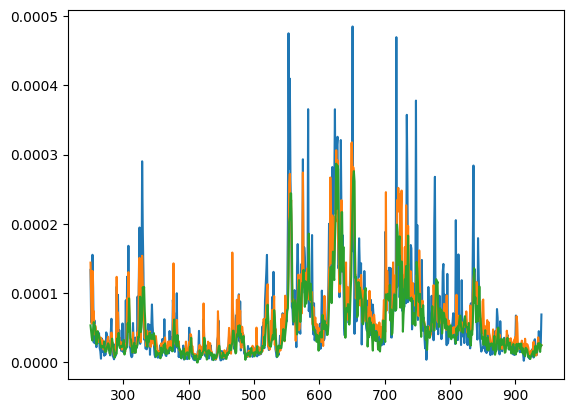

In [12]:
plt.plot(true_val[250:])
plt.plot(rf_pred[250:])
plt.plot(nn_pred[250:])
plt.show()

### We can see that for the most part, the NN underpredicts spikes and stays closer to the trend (2020 spike excluded)